In [ ]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from oasis.functions import deconvolve # install using conda install to avoid having to build
from scipy import signal
from dewan_calcium import DewanDeconv

In [2]:
FRAMERATE=20

In [7]:
file_path = Path('C:\Projects\Test\\traces.csv')

transients = DewanDeconv.load_transients(file_path)
zscore_transients = DewanDeconv.z_score_data(transients)


In [22]:
raw_transient = zscore_transients['C00']
smooth_transient = DewanDeconv.smooth_data(('C00', raw_transient))

In [31]:
peak_args = {
    'width': 0.4,
    'distance': 0.1,
    'height': 1,
}

peaks = DewanDeconv.find_peaks(smooth_transient, 10, peak_args)

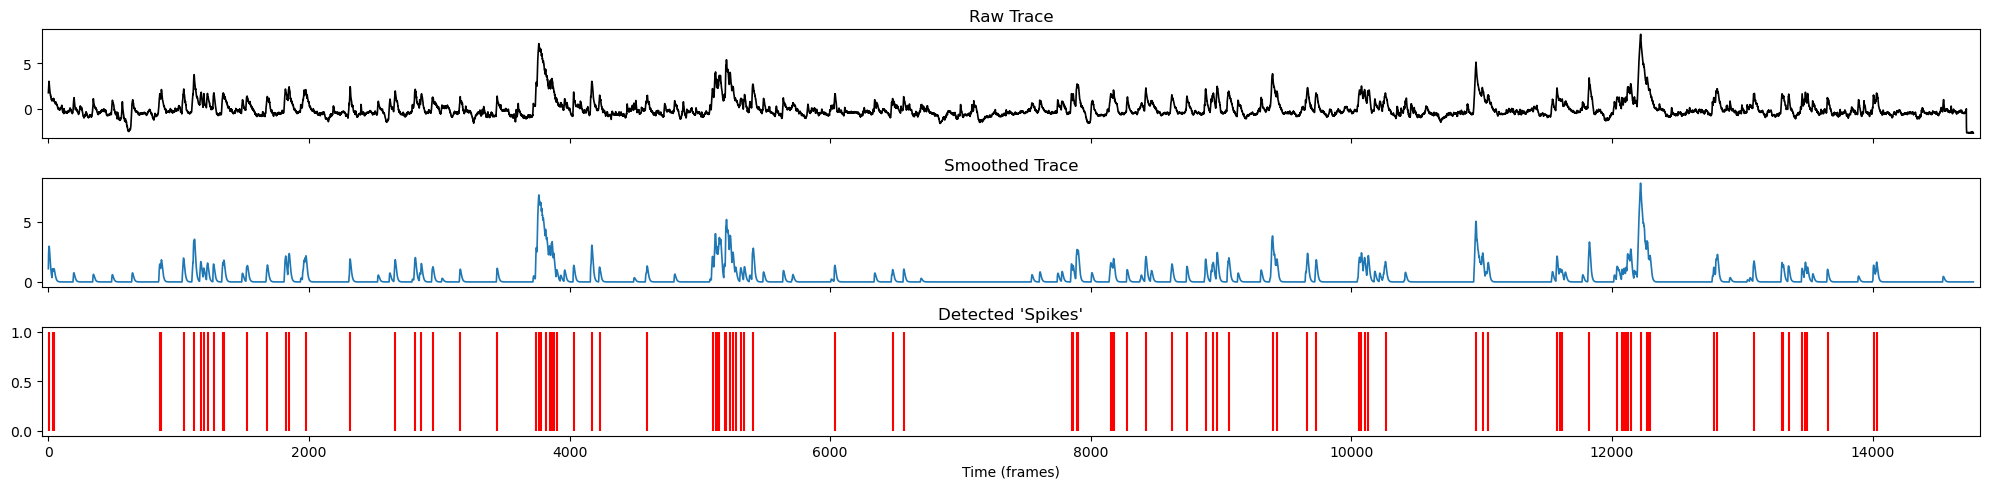

In [80]:
fig, ax = plt.subplots(3,1, sharex=True, figsize = (20, 5))
ax[0].plot(raw_transient.values, color='k', linewidth=1.2)
ax[0].title.set_text('Raw Trace')

ax[1].plot(smooth_transient, linewidth=1.2)
ax[1].title.set_text('Smoothed Trace')

ax[2].vlines(peaks[0], color='r', ymin=0, ymax=1)
ax[2].title.set_text('Detected \'Spikes\'')
ax[2].set_xlabel('Time (frames)')

ax[2].set_xlim([-50, len(smooth_transient)+50])

fig.tight_layout()

fig.savefig(file_path.with_name('combined').with_suffix('.pdf'), dpi=900)

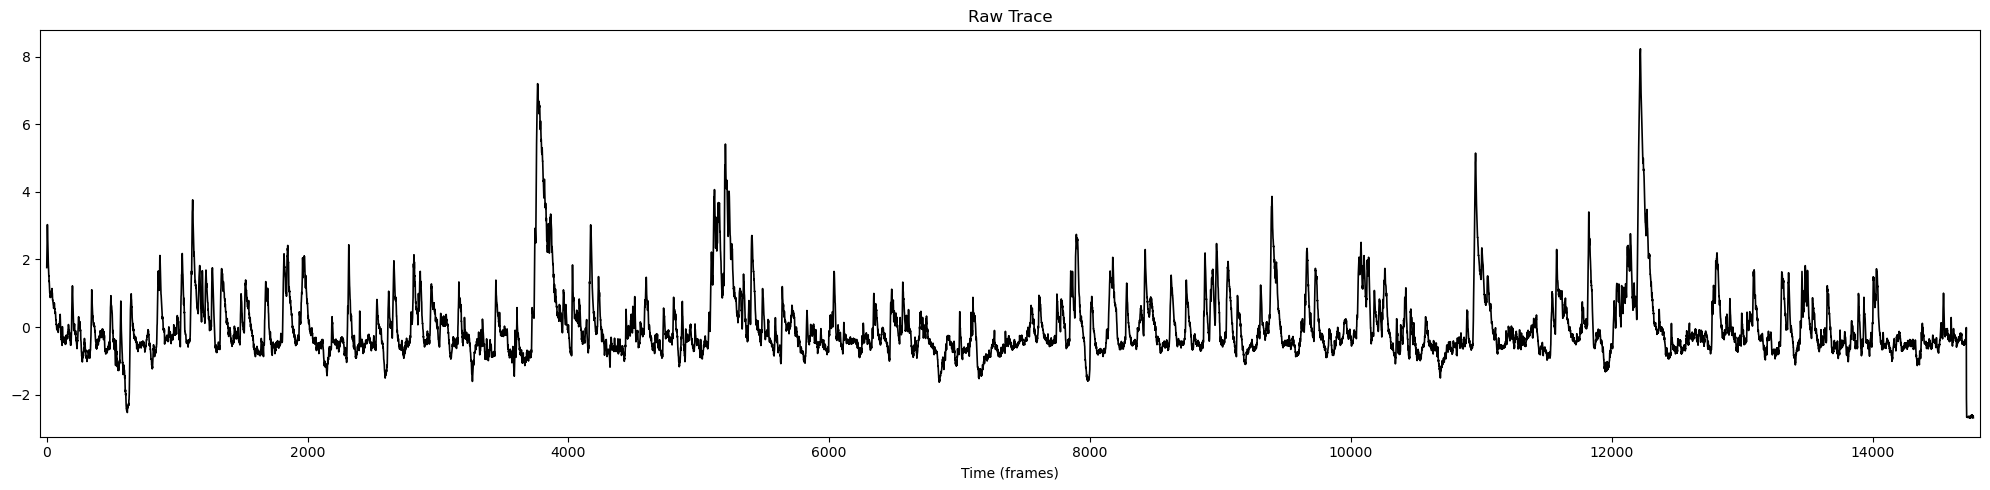

In [82]:
fig, ax = plt.subplots(figsize = (20, 5))
ax.plot(raw_transient.values, color='k', linewidth=1.2)
ax.title.set_text('Raw Trace')
ax.set_xlabel('Time (frames)')

ax.set_xlim([-50, len(smooth_transient)+50])

fig.tight_layout()
fig.savefig(file_path.with_name('raw_trace_2').with_suffix('.pdf'), dpi=900)

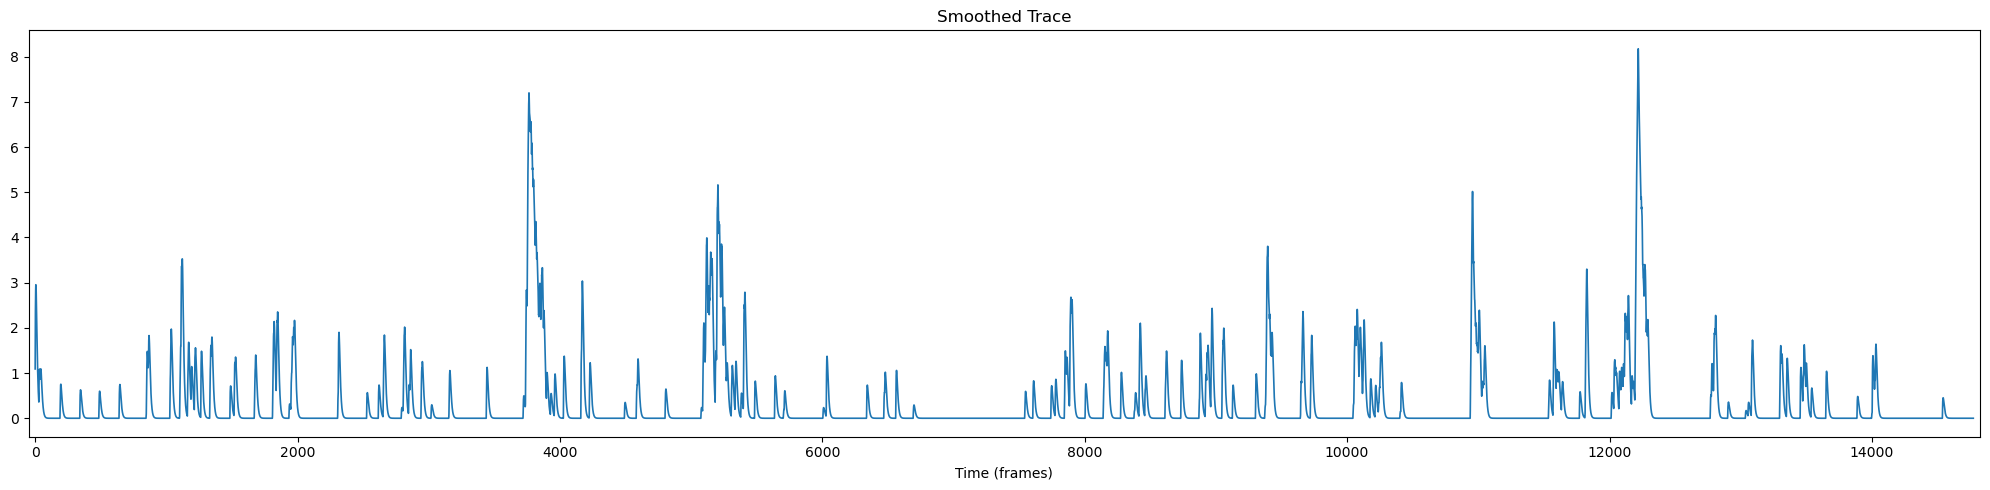

In [83]:
fig, ax = plt.subplots(figsize = (20, 5))
ax.plot(smooth_transient, linewidth=1.2)
ax.title.set_text('Smoothed Trace')
ax.set_xlabel('Time (frames)')

ax.set_xlim([-50, len(smooth_transient)+50])

fig.tight_layout()
fig.savefig(file_path.with_name('smooth_trace_2').with_suffix('.pdf'), dpi=900)

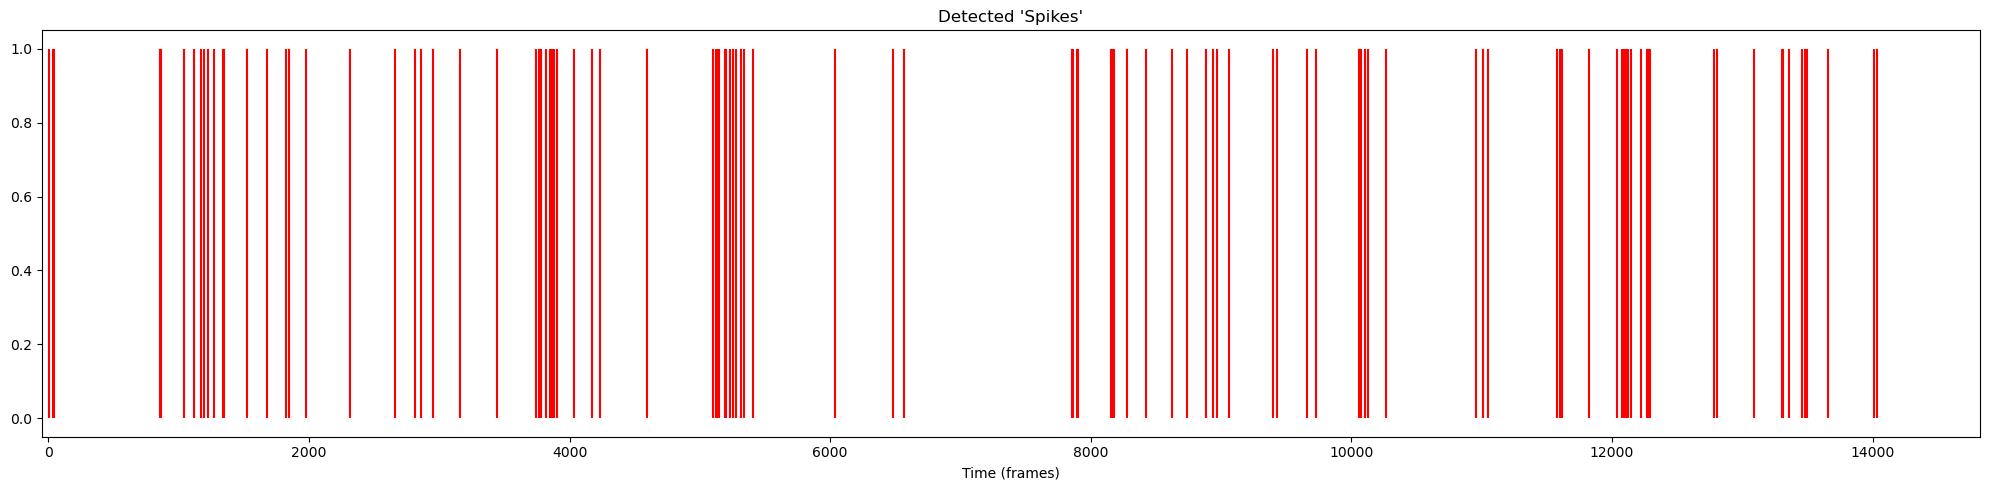

In [84]:
fig, ax = plt.subplots(figsize = (20, 5))

ax.vlines(peaks[0], color='r', ymin=0, ymax=1)
ax.title.set_text('Detected \'Spikes\'')
ax.set_xlabel('Time (frames)')

ax.set_xlim([-50, len(smooth_transient)+50])

fig.tight_layout()
fig.savefig(file_path.with_name('peaks_2').with_suffix('.pdf'), dpi=900)